In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

import seaborn as sns
import math

In [6]:
# Load the dataset
dataFrame = pd.read_csv('./data/survey_lung_cancer.csv')
dataFrame.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [7]:
# display the dataFrame details 
df = dataFrame.copy() 
df.info()
x, y = df.shape
print(f'\n\nThere are {x} records and {y} features.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [8]:
# Verify if there are missing data in the dataframe
def check_missing(df):
    
    out = df.isnull().sum()
    
    if out.sum() == 0:
        print('No missing data, therefore no imputation necessary')
        return out
    else:
        print('There are missing data, proceed to data imputation as necessary')
        return out
    
check_missing(df)

No missing data, therefore no imputation necessary


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [9]:
# Ensure that the gender column only has 'M' and 'F' and encode the gender column to factors 0 for female and 1 for male

def encode_gender(df):
    
    unique = df['GENDER'].unique()
    print(f'Unique gender values: {unique}')
    
    df['GENDER'] = df['GENDER'].astype(str).str.strip().str.upper().map({'M':1, 'F':0})
    
    return df.head()

encode_gender(df)

Unique gender values: ['M' 'F']


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [177]:
# Ensure that the LUNG_CANCER column only has 'YES' and 'NO' and 
# Encode the LUNG_CANCER column to factors 1 for YES and 0 for NO

def encode_lung_cancer(df):
    
    unique = df['LUNG_CANCER'].unique()
    print(f'Unique lung cancer values: {unique}')
    
    df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES':1, 'NO':0})
    
    return df.head()

encode_lung_cancer(df)

Unique lung cancer values: ['YES' 'NO']


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [178]:
def check_remaining(df):
    
    cols=['GENDER', 'LUNG_CANCER', 'AGE']

    for feature in df.columns:
        if feature not in cols:
            unique = df[feature].unique()
            print(f'{feature} => {unique}')
            
check_remaining(df)

SMOKING => [1 2]
YELLOW_FINGERS => [2 1]
ANXIETY => [2 1]
PEER_PRESSURE => [1 2]
CHRONIC DISEASE => [1 2]
FATIGUE  => [2 1]
ALLERGY  => [1 2]
WHEEZING => [2 1]
ALCOHOL CONSUMING => [2 1]
COUGHING => [2 1]
SHORTNESS OF BREATH => [2 1]
SWALLOWING DIFFICULTY => [2 1]
CHEST PAIN => [2 1]


In [179]:
# Encode the remaining features so that 2(YES) is 1 and 1(N0) is 0

def encode_remaining(df):

    for feature in df.columns:
        if feature not in cols:
            df[feature] = df[feature].replace({2:1, 1:0})

    return df.head()

encode_remaining(df)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [180]:
# What is the corelation between gender, age, smoking, alcohol consumption, and lung cancer?

def corr(df):
    
    corr_features = df.columns
    corr_df = df[corr_features]
    
    corr_matrix = corr_df.corr()
    
    return corr_matrix

corr(df)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


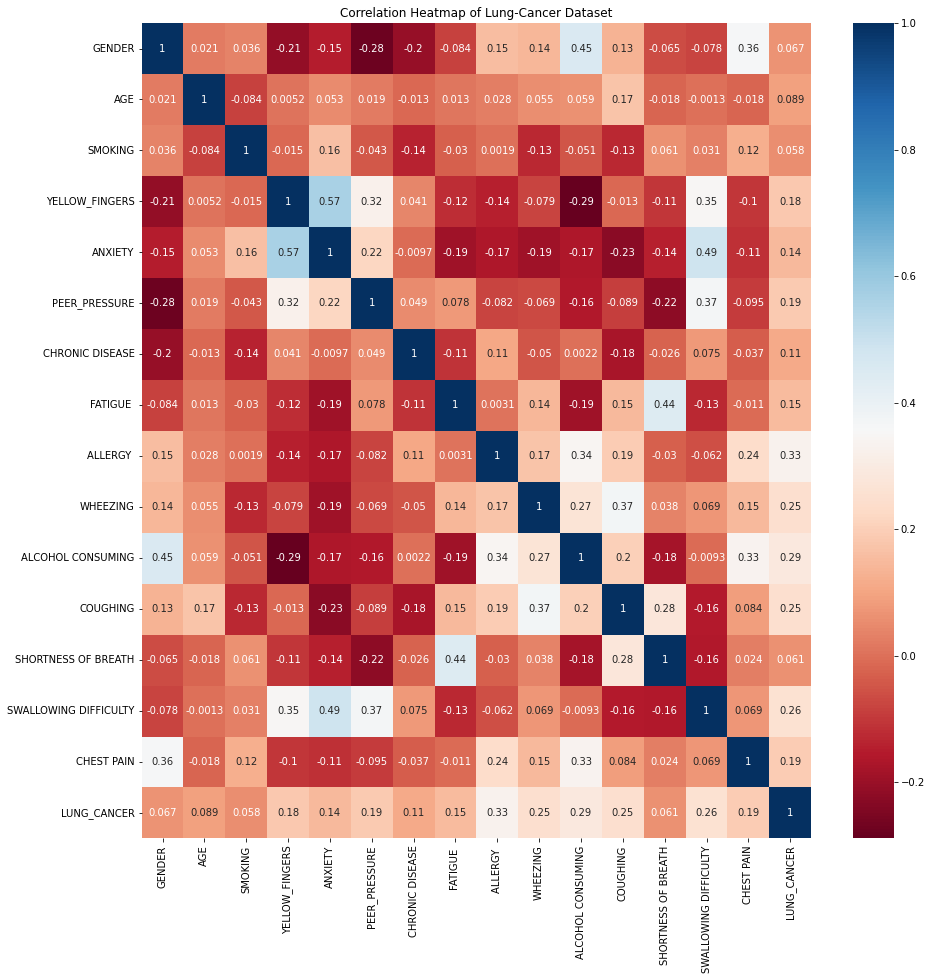

In [181]:
def plot(df):
    plt.figure(figsize=(15,15))
    sns.heatmap(df.corr(), annot=True, cmap="RdBu")
    plt.title("Correlation Heatmap of Lung-Cancer Dataset")
    plt.show()
    
plot(df)

In [182]:
# What is the correlation between gender and Lung cancer?
# Answer
def gender_lung_cancer_corr(df):
    
    out =  pd.crosstab(df['GENDER'], df['LUNG_CANCER'], normalize = True)
    
    F_rate = round(out[1][0] * 100, 2)
    M_rate = round(out[1][1] * 100, 2)
    
    print(f'Male have {M_rate}% chance and female have {F_rate}% chance of developing lung cancer')
    
    return

gender_lung_cancer_corr(df)

Male have 46.93% chance and female have 40.45% chance of developing lung cancer


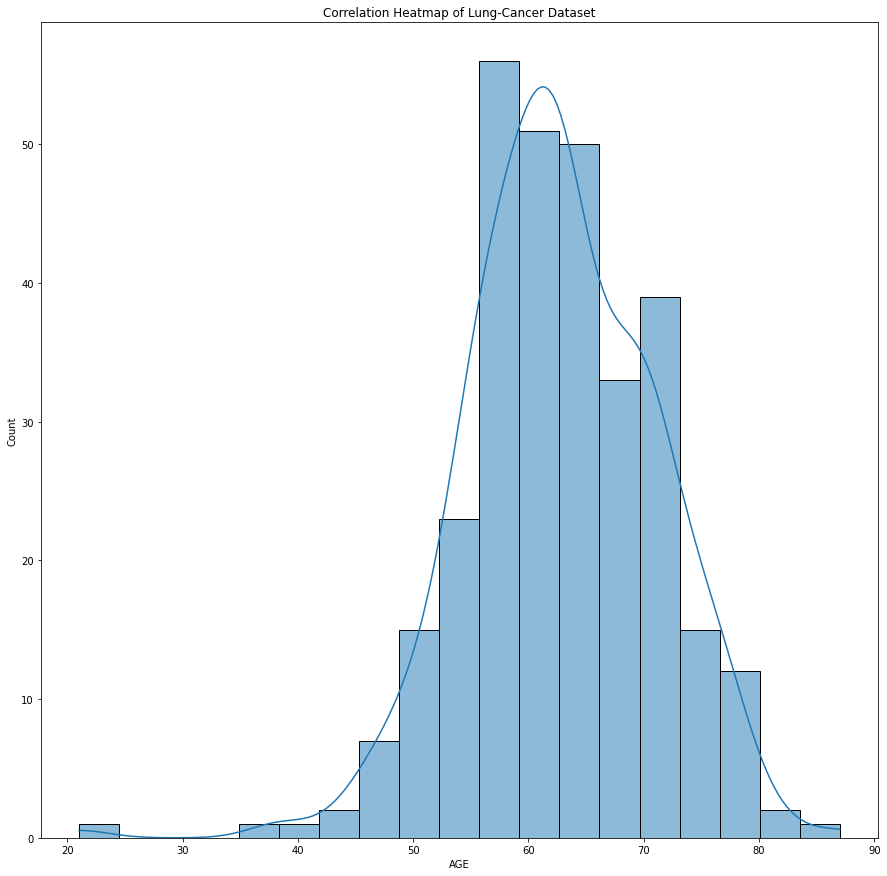

In [191]:
# What is the age distribution?
#Answer

plt.figure(figsize=(15,15))
sns.histplot(df['AGE'], kde = True, )
plt.title("Age distribution of the Lung-Cancer Dataset")
plt.show()


In [156]:
# split data into a training set and a test set
# The code below splits shuffles and split the data (80% for training and 20% for testing)

features = df.drop(columns = 'LUNG_CANCER', axis = 1)
target = df['LUNG_CANCER']

def train_test_split(features, target, train_size = 0.8, seed = 600):
    # create indices
    np.random.seed(seed)
    size = len(features)
    
    idx_arr = np.arange(size)
    
    np.random.shuffle(idx_arr)
    
    training_size = math.floor(size * train_size)
    
    training_idx = idx_arr[:training_size]
    test_idx = idx_arr[training_size:]

    
    training_features = features.iloc[training_idx]
    test_features = features.iloc[test_idx]
    training_target = target.iloc[training_idx]
    test_target = target.iloc[test_idx]
    
    return training_features, test_features, training_target, test_target


train_test_split(features, target, train_size = 0.8, seed = 600)

(     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
 119       0   56        0               1        1              1   
 189       0   67        1               1        1              1   
 186       0   72        0               1        1              1   
 182       1   71        0               0        0              0   
 143       0   63        1               1        1              1   
 ..      ...  ...      ...             ...      ...            ...   
 258       1   70        1               0        1              0   
 10        0   61        1               1        1              1   
 170       1   54        0               1        0              1   
 56        0   63        0               1        0              1   
 59        1   69        1               1        1              1   
 
      CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
 119                0         0         1         0                  1   
 189      

In [157]:
 # Logistic regression for binary classification
    
def logistic_regression(df):
    log_reg_model = LogisticRegression(max_iter = 5000, solver = 'saga')

    training_features, test_features, training_target, test_target = train_test_split(features, target, train_size = 0.8, seed = 600)

    log_reg_model.fit(training_features, training_target) # Fitting the model

    predictions = log_reg_model.predict(test_features) # prediction
    
    accuracy = round(accuracy_score(test_target, predictions)*100, 2)
    
    conf_matrix = confusion_matrix(test_target, predictions)

    print(f'This logistic regression model is: {accuracy}% accurate.\n')
    print(f'The confusion matrix:\n {conf_matrix}\n')
    print(f'{conf_matrix[0][0]} out of {conf_matrix[0][0] + conf_matrix[0][1]} No Lung Cancer were accurately predicted and {conf_matrix[1][1]} out of {conf_matrix[1][0] + conf_matrix[1][1]} Lung Cancer where accurately predicted.')
    
logistic_regression(df)

This logistic regression model is: 91.94% accurate.

The confusion matrix:
 [[ 7  3]
 [ 2 50]]

7 out of 10 No Lung Cancer were accurately predicted and 50 out of 52 Lung Cancer where accurately predicted.


In [158]:
# Are there all the features necessary to predicting how likely a person is to developing the disease? 

def pca_func(df):
    
    features = df.drop(columns = 'LUNG_CANCER', axis = 1) # Lung Cancer is the target

    pca = PCA(n_components = 0.95) #Select the minimum number of PC necessary to explain at least 95% of the total variance

    features_pca = pca.fit_transform(features)

    return pca.n_components_

pca_func(df)

1

In [166]:
# A value of 1 is not a good indicator let's explicitly select the 5 most important features that explain the dataset
def pca_5(df):
    
    features = df.drop(columns = 'LUNG_CANCER', axis = 1) # Lung Cancer is the target
    pca = PCA(n_components=5)
    features_pca = pca.fit_transform(features)
    
    print(f'{pca.n_components_} principal components can explain {round(pca.explained_variance_ratio_.sum()*100,2)}% of the data.')
    
    return pca.explained_variance_ratio_.sum(), pca.n_components_

pca_5(df)

5 principal components can explain 97.81% of the data.


(0.9780585514926708, 5)

## Conclusion

There were no missing data, and most data were factor. Therefore, no imputation nor scaling was needed.
The correlation heatmap was used to show the correlation between the data since the table was too large and less intuisive. It can be noticed that the data are not highly correlated and the higher correlation are observed between peer_pressure and yellow fingers, yellow_fingers and anxiety, chest_pain and anxiety, and alcohol_consuming and gender. The age distribution follows a normal distribution with the highest population aged 56 to 60. The gender corelation shows that male have 46.93% chance and female have 40.45% chance of developing lung cancer, whicjh makes them 6.48% most likely to develop the disease.
The saga solver was used for the logistic regression model as it is a good one for medical datasets and correlated symptoms. The model yields an accuracy of about 92% on the test dataset. The high prediction success rate might be due to the size of the data set or the model overfitting the features and further investigation might be needed.
The principal components analysis however only retained 1 PCA which may be an indiacation that the data were engineered carefully filtered before the analysis.
